In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
#Import scikit-learn dataset library
from sklearn import datasets

import matplotlib.pyplot as plt

from sklearn.datasets import load_files

#Import train_test_split function
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix

import random as rd

from sklearn.feature_extraction.text import CountVectorizer



In [80]:
#Download and extract data
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
#!tar -xjf 20021010_easy_ham.tar.bz2
#!tar -xjf 20021010_hard_ham.tar.bz2
#!tar -xjf 20021010_spam.tar.bz2
!tar -xjf "20021010_easy_ham.tar.bz2" -C /home/kokki/introDIT407/Module_4/easy_ham/
!tar -xjf "20021010_hard_ham.tar.bz2" -C /home/kokki/introDIT407/Module_4/hard_ham/
!tar -xjf "20021010_spam.tar.bz2" -C /home/kokki/introDIT407/Module_4/spam/


*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

In [81]:
!ls -lah

total 8,0M
drwxrwxr-x 9 kokki kokki 4,0K apr 26 18:33 .
drwxrwxr-x 7 kokki kokki 4,0K apr 24 14:42 ..
-rw-rw-r-- 1 kokki kokki 1,6M jun 29  2004 20021010_easy_ham.tar.bz2
-rw-rw-r-- 1 kokki kokki 1,6M jun 29  2004 20021010_easy_ham.tar.bz2.1
-rw-rw-r-- 1 kokki kokki 998K dec 16  2004 20021010_hard_ham.tar.bz2
-rw-rw-r-- 1 kokki kokki 998K dec 16  2004 20021010_hard_ham.tar.bz2.1
-rw-rw-r-- 1 kokki kokki 1,2M jun 29  2004 20021010_spam.tar.bz2
-rw-rw-r-- 1 kokki kokki 1,2M jun 29  2004 20021010_spam.tar.bz2.1
-rw-rw-r-- 1 kokki kokki  23K apr 25 10:52 cm_assignment2_2.png
drwx--x--x 5 kokki kokki 168K apr 24 14:45 easy_ham
drwxrwxr-x 4 kokki kokki 4,0K apr 25 09:49 easyhardspam
drwxrwxr-x 4 kokki kokki 4,0K apr 24 15:57 easyspam
drwx--x--x 3 kokki kokki  20K apr 24 14:46 hard_ham
drwxrwxr-x 4 kokki kokki 4,0K apr 25 09:44 hardspam
-rw-rw-r-- 1 kokki kokki 281K apr 26 18:33 IDSAI_Assignment4_SP4_22-23.ipynb
drwxrwxr-x 2 kokki kokki 4,0K apr 23 15:05 .ipynb_checkpoints
-rw-rw-r-- 1 kokki 

In [112]:
#putting data into folders

#ta bort de 3 nedan? isf ta bort/ändra looking for a few emails delen
easy_ham = load_files("/home/kokki/introDIT407/Module_4/easy_ham", encoding="latin1", shuffle=True)
hard_ham= load_files("/home/kokki/introDIT407/Module_4/hard_ham", encoding="latin1", shuffle=True)
spam = load_files("/home/kokki/introDIT407/Module_4/spam", encoding="latin1", shuffle=True)

#folder containing easy_ham and spam
easyspam = datasets.load_files('./easyspam')

#folder containing hard_ham and spam
hardspam = datasets.load_files('./hardspam')

#folder containing easy_ham + hardham, and spam
easyhardspam = datasets.load_files('./easyhardspam')


### 1. Preprocessing: 

##### 1.1 Look at a few emails from easy_ham, hard_ham and spam. Do you think you would be able to classify the emails just by inspection? How do you think a succesful model can learn the difference between the different classes of emails?


It's easy to tell the difference between easy_ham and spam, it's sometimes hard to tell the difference between hard-ham and spam, hard-ham often take the shape of poorly written newsletters, which resemble some of the strange offers embedded in spam messages

& in spam the mailadress that sent the spam often starts with "mail",  "Received: from mail...."


In [83]:
# Write your code for here for looking a few emails

#prints first 10 email of easy_ham
#print(easy_ham.data[:10])

#prints first 10 email of hard_ham
#print(hard_ham.data[:10])

#prints first 10 email of spam
#print(spam.data[:10])


Answer 1.1:

##### 1.2 Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text (in the optional part further down can experiment with filtering out the headers and footers). We don’t want to train and test on the same data (it might help to reflect on why if you don't recall). Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`). Use only the easy_ham part as ham data for quesions 1 and 2.

In [84]:
# Write your code for here for splitting the data

# Split dataset into training set and test set 

#ham labeled 0 and spam labeled 1
hamtrain, hamtest, spamtrain, spamtest = train_test_split(easyspam.data, easyspam.target, test_size=0.3, random_state=42)


#print(spamtest)
#print(hamtest)


### 2.1 Write a Python program that: 
1.	Uses the four datasets from Question 1 (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (use the [scikit-learn library](https://scikit-learn.org/stable/)) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. Use `CountVectorizer` ([Documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)) to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in scikit-learn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem:
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate before you start coding. 



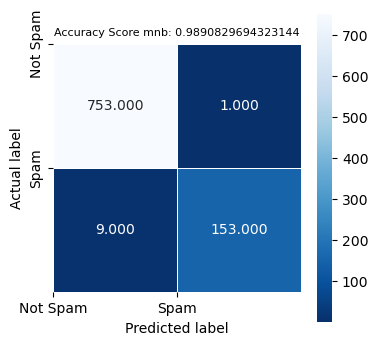

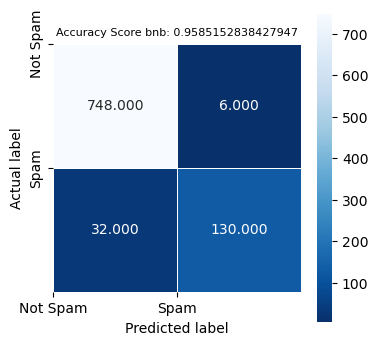

In [96]:
# Code for Bayes classifiers 
#Multinomial Naive Bayes and Bernoulli Naive Bayes

#using CountVectorizer to transform the email texts into vectors
coun_vect = CountVectorizer(decode_error = 'ignore')
hamtrain_vect = count_vect.transform(hamtrain)
hamtest_vect = count_vect.transform(hamtest)

#Multinomial Naive Bayes
mnb = MultinomialNB(force_alpha=True)
mnb.fit(hamtrain_vect, spamtrain)

#Predict the response for test dataset
y_pred_mnb = mnb.predict(hamtest_vect)

# Prints Model accuracy (how often our classifier is correct)
score1=accuracy_score(spamtest, y_pred_mnb)

#Plots confusion matrix
cm = metrics.confusion_matrix(spamtest, y_pred_mnb)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label',fontsize=10);
plt.xlabel('Predicted label',fontsize=10);
plt.xticks(np.arange(2), ['Not Spam','Spam'])
plt.yticks(np.arange(2), ['Not Spam','Spam'])
all_sample_title = 'Accuracy Score mnb: {0}'.format(score1)
plt.title(all_sample_title, size = 8);

#Bernoulli Naive Bayes
bnb = BernoulliNB(force_alpha=True)
bnb.fit(hamtrain_vect, spamtrain)

#Predict the response for test dataset
y_pred_bnb = bnb.predict(hamtest_vect)

# Prints Model accuracy (how often our classifier is correct)
score2=accuracy_score(spamtest, y_pred_bnb)

#Plots confusion matrix
cm = metrics.confusion_matrix(spamtest, y_pred_bnb)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label',fontsize=10);
plt.xlabel('Predicted label',fontsize=10);
plt.xticks(np.arange(2), ['Not Spam','Spam'])
plt.yticks(np.arange(2), ['Not Spam','Spam'])
all_sample_title = 'Accuracy Score bnb: {0}'.format(score2)
plt.title(all_sample_title, size = 8);

### 2.2 Answer the following questions:
##### a) What does the CountVectorizer do?
Answer 2.2.a
CountVectorizer converts a collection of text documents (in our case emails) into a matrix of token counts (words?). It does this by breaking up the text into words and then counts the frequency of each word (token).

Elis text: 
CountVectorizer takes the data column and gives every unique word found in one of the emails its own column, then it adds the frequency of each word per row, depending on the data value on that row, for example row 3 has the word Money appear 4 times, that means that the Money column will have the value 4 on row 3.


##### b) What is the difference between Multinomial Naive Bayes and Bernoulli Naive Bayes
Answer 2.2.b
While both classification algorithms are based on Bayes theorem, Multinomial Naive bayes assumes word counts, for text classification, are generated from a multinomial distribution while Bernoulli Naive Bayes assume they are generated from a Bernoulli distribution. Meaning MultinomialNB uses discrete input features (word counts). BernoulliNB is used when the input features are binary, such as the presence of a certain word in a text document.



### 3.1 Run the two models:
Run (don't retrain) the two models from Question 2 on spam versus hard-ham. Does the performance differ compared to question 2 when the model was run on spam versus easy-ham? If so, why?

Answer:
We can clearly see that the performance differs. The accuracy is worse when using hard_ham vs spam on a model trained for easy_ham vs spam. This is because the hard_ham and easy_ham are different. The model only learned the patterns and relationships in easy_ham and since the data is relatively different the model cannot make very accurate predictions on the new data without retraining it. 

Difference in accuracy score for mnb 0.024365266452834655
Difference in accuracy score for bnb 0.40984271747111334


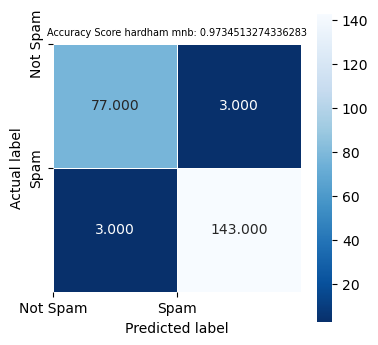

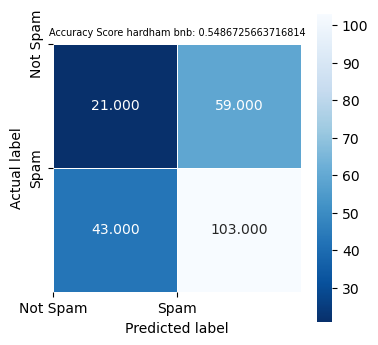

In [101]:
# Split dataset into training set and test set 
# hard_ham labeled 0 and spam labeled 1
hardhamtrain, hardhamtest, spamtrain, spamtest = train_test_split(hardspam.data, hardspam.target, test_size=0.3, random_state=42)

#using CountVectorizer to transform the email texts into vectors
hardhamtrain_vect = count_vect.transform(hardhamtrain)
hardhamtest_vect = count_vect.transform(hardhamtest)

#Predict the response for test dataset now when using Hard_ham
y_pred_mnb = mnb.predict(hardhamtest_vect)

# Prints Model accuracy (how often our classifier is correct)
score1_hardham =accuracy_score(spamtest, y_pred_mnb)

#Plots confusion matrix
cm = metrics.confusion_matrix(spamtest, y_pred_mnb)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label',fontsize=10);
plt.xlabel('Predicted label',fontsize=10);
plt.xticks(np.arange(2), ['Not Spam','Spam'])
plt.yticks(np.arange(2), ['Not Spam','Spam'])
all_sample_title = 'Accuracy Score hardham mnb: {0}'.format(score1_hardham)
plt.title(all_sample_title, size = 7);

#Predict the response for test dataset now when using Hard_ham
y_pred_bnb = bnb.predict(hardhamtest_vect)

# Prints Model accuracy (how often our classifier is correct)
score2_hardham=accuracy_score(spamtest, y_pred_bnb)

#Plots confusion matrix
cm = metrics.confusion_matrix(spamtest, y_pred_bnb)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label',fontsize=10);
plt.xlabel('Predicted label',fontsize=10);
plt.xticks(np.arange(2), ['Not Spam','Spam'])
plt.yticks(np.arange(2), ['Not Spam','Spam'])
all_sample_title = 'Accuracy Score hardham bnb: {0}'.format(score2_hardham)
plt.title(all_sample_title, size = 7);

mnb_difference=score1-score1_hardham
print("Difference in accuracy score for mnb", mnb_difference)
bnb_difference=score2-score2_hardham
print("Difference in accuracy score for bnb", bnb_difference)

### 3.2 Retrain
Retrain new Multinomial and Bernolli Naive Bayes classifers on the combined (easy+hard) ham and spam. Now evaluate on spam versus hard-ham as in 3.1. Also evaluate on spam versus easy-ham. Compare the performance with question 2 and 3.1. What do you observe?

Answer:
We see that by training our models with the data from both easy_ham and hard_ham gives us much more accurate predictions from the models. We also see that predictions made when using hard_ham gives us a much lower accuracy than the predictions we made easy_ham. This is probably because easy_ham contains more than 10 times as many emails than hard_ham does. Thus the model is better adjusted for emails from easy_ham.


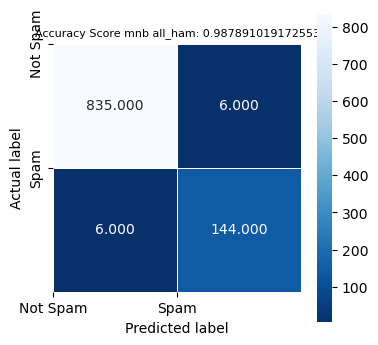

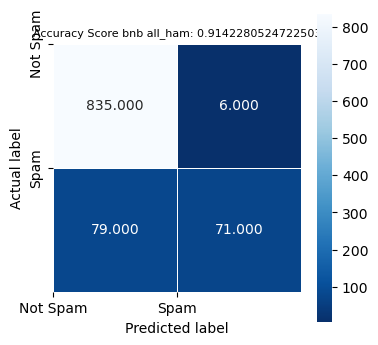

In [107]:
#Retrained on easy+hard ham and spam

# Split dataset into training set and test set 
# hard_ham+easy_ham labeled 0 and spam labeled 1
fullhamtrain, fullhamtest, spamtrain, spamtest = train_test_split(easyhardspam.data, easyhardspam.target, test_size=0.3, random_state=42)

#using CountVectorizer to transform the email texts into vectors
fullhamtrain_vect = count_vect.transform(fullhamtrain)
fullhamtest_vect = count_vect.transform(fullhamtest)

#fit Multinomial Naive Bayes
mnb.fit(fullhamtrain_vect, spamtrain)

#Predict the response for test dataset
y_pred_mnb = mnb.predict(fullhamtest_vect)

#Prints Model accuracy (how often our classifier is correct)
score1_full=accuracy_score(spamtest, y_pred_mnb)

#Plots confusion matrix
cm = metrics.confusion_matrix(spamtest, y_pred_mnb)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label',fontsize=10);
plt.xlabel('Predicted label',fontsize=10);
plt.xticks(np.arange(2), ['Not Spam','Spam'])
plt.yticks(np.arange(2), ['Not Spam','Spam'])
all_sample_title = 'Accuracy Score mnb all_ham: {0}'.format(score1_full)
plt.title(all_sample_title, size = 8);

#fit Bernoulli Naive Bayes
bnb.fit(fullhamtrain_vect, spamtrain)

#Predict the response for test dataset
y_pred_bnb = bnb.predict(fullhamtest_vect)

#Prints Model accuracy (how often our classifier is correct)
score2_full=accuracy_score(spamtest, y_pred_bnb)

#Plots confusion matrix
cm = metrics.confusion_matrix(spamtest, y_pred_bnb)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label',fontsize=10);
plt.xlabel('Predicted label',fontsize=10);
plt.xticks(np.arange(2), ['Not Spam','Spam'])
plt.yticks(np.arange(2), ['Not Spam','Spam'])
all_sample_title = 'Accuracy Score bnb all_ham: {0}'.format(score2_full)
plt.title(all_sample_title, size = 8);


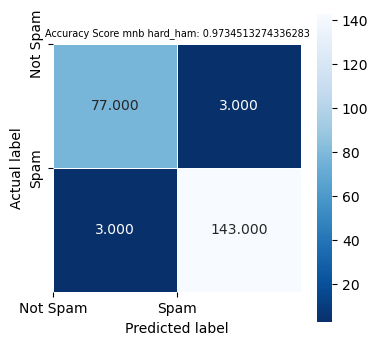

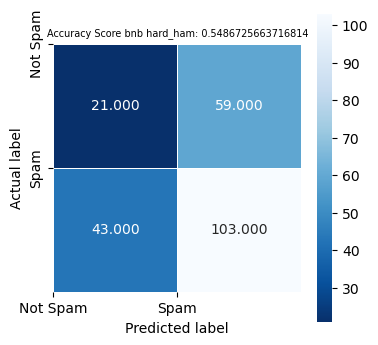

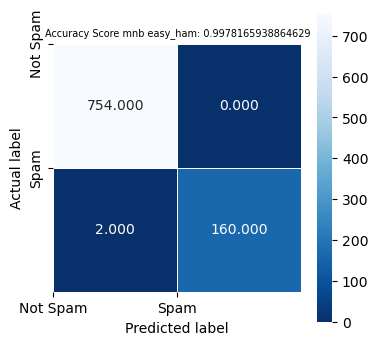

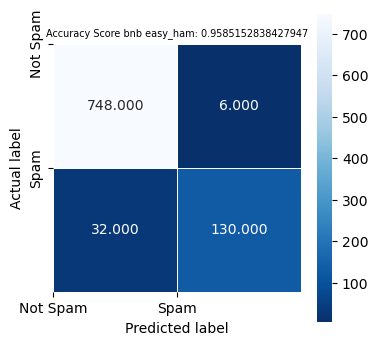

In [109]:
# Split dataset into training set and test set 
# hard_ham labeled 0 and spam labeled 1
hardhamtrain, hardhamtest, spamtrain, spamtest = train_test_split(hardspam.data, hardspam.target, test_size=0.3, random_state=42)

#using CountVectorizer to transform the email texts into vectors
hardhamtrain_vect = count_vect.transform(hardhamtrain)
hardhamtest_vect = count_vect.transform(hardhamtest)

#Predict the response for test dataset now when using Hard_ham
y_pred_mnb = mnb.predict(hardhamtest_vect)

# Prints Model accuracy (how often our classifier is correct)
score1_hardham =accuracy_score(spamtest, y_pred_mnb)

#Plots confusion matrix
cm = metrics.confusion_matrix(spamtest, y_pred_mnb)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label',fontsize=10);
plt.xlabel('Predicted label',fontsize=10);
plt.xticks(np.arange(2), ['Not Spam','Spam'])
plt.yticks(np.arange(2), ['Not Spam','Spam'])
all_sample_title = 'Accuracy Score mnb hard_ham: {0}'.format(score1_hardham)
plt.title(all_sample_title, size = 7);

#Predict the response for test dataset now when using Hard_ham
y_pred_bnb = bnb.predict(hardhamtest_vect)

# Prints Model accuracy (how often our classifier is correct)
score2_hardham=accuracy_score(spamtest, y_pred_bnb)

#Plots confusion matrix
cm = metrics.confusion_matrix(spamtest, y_pred_bnb)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label',fontsize=10);
plt.xlabel('Predicted label',fontsize=10);
plt.xticks(np.arange(2), ['Not Spam','Spam'])
plt.yticks(np.arange(2), ['Not Spam','Spam'])
all_sample_title = 'Accuracy Score bnb hard_ham: {0}'.format(score2_hardham)
plt.title(all_sample_title, size = 7);
#--------------------------------------------------------

#ham labeled 0 and spam labeled 1
hamtrain, hamtest, spamtrain, spamtest = train_test_split(easyspam.data, easyspam.target, test_size=0.3, random_state=42)

hamtrain_vect = count_vect.transform(hamtrain)
hamtest_vect = count_vect.transform(hamtest)

#Predict the response for test dataset now with easy_ham
y_pred_mnb = mnb.predict(hamtest_vect)

# Prints Model accuracy (how often our classifier is correct)
score1=accuracy_score(spamtest, y_pred_mnb)

#Plots confusion matrix
cm = metrics.confusion_matrix(spamtest, y_pred_mnb)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label',fontsize=10);
plt.xlabel('Predicted label',fontsize=10);
plt.xticks(np.arange(2), ['Not Spam','Spam'])
plt.yticks(np.arange(2), ['Not Spam','Spam'])
all_sample_title = 'Accuracy Score mnb easy_ham: {0}'.format(score1)
plt.title(all_sample_title, size = 7);

#Bernoulli Naive Bayes
bnb = BernoulliNB(force_alpha=True)
bnb.fit(hamtrain_vect, spamtrain)

#Predict the response for test dataset now with easy_ham
y_pred_bnb = bnb.predict(hamtest_vect)

# Prints Model accuracy (how often our classifier is correct)
score2=accuracy_score(spamtest, y_pred_bnb)

#Plots confusion matrix
cm = metrics.confusion_matrix(spamtest, y_pred_bnb)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label',fontsize=10);
plt.xlabel('Predicted label',fontsize=10);
plt.xticks(np.arange(2), ['Not Spam','Spam'])
plt.yticks(np.arange(2), ['Not Spam','Spam'])
all_sample_title = 'Accuracy Score bnb easy_ham: {0}'.format(score2)
plt.title(all_sample_title, size = 7);

In [104]:
coun_vect = CountVectorizer(decode_error = 'ignore')
count_matrix = coun_vect.fit_transform(easyspam.data)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
print(df["money"])

hamtrain, hamtest, spamtrain, spamtest = train_test_split(df, easyspam.target, test_size=0.3, random_state=42)


0       0
1       0
2       0
3       0
4       0
       ..
3047    0
3048    0
3049    0
3050    0
3051    0
Name: money, Length: 3052, dtype: int64


Answer 3.1:

In [105]:
# Write your code here

Answer 3.2:

### 3.3 Further improvements
Do you have any suggestions for how performance could be further improved? You don't have to implement them, just present your ideas.

Answer 3.3:
A Lot of the tokens collected are strings of numbers and gibberish that aren’t part of the actual email text. Filtering out these tokens could potentially improve accuracy. Using all three classes for training the model could potentially be beneficial as well!
